<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/mnist_corrupted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Load MNIST corrupted dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist_corrupted/zigzag', # Tipe corrupt bisa diganti, misal 'mnist_corrupted/spatter'
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist_corrupted/zigzag/incomplete.ZPG7FB_1.0.0/mnist_corrupted-train.tfrec…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist_corrupted/zigzag/incomplete.ZPG7FB_1.0.0/mnist_corrupted-test.tfreco…

Dataset mnist_corrupted downloaded and prepared to /root/tensorflow_datasets/mnist_corrupted/zigzag/1.0.0. Subsequent calls will reuse this data.


In [3]:
# Normalize the data
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [4]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# Train the model
model.fit(
    ds_train,
    epochs=5,
    validation_data=ds_test
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 121ms/step - accuracy: 0.8171 - loss: 0.6024 - val_accuracy: 0.9717 - val_loss: 0.0894
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 112ms/step - accuracy: 0.9741 - loss: 0.0854 - val_accuracy: 0.9783 - val_loss: 0.0691
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 111ms/step - accuracy: 0.9823 - loss: 0.0583 - val_accuracy: 0.9774 - val_loss: 0.0641
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 111ms/step - accuracy: 0.9862 - loss: 0.0439 - val_accuracy: 0.9832 - val_loss: 0.0502
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.9895 - loss: 0.0337 - val_accuracy: 0.9855 - val_loss: 0.0425


In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(ds_test)
print('\nTest accuracy:', test_acc)

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9851 - loss: 0.0411

Test accuracy: 0.9854999780654907


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 


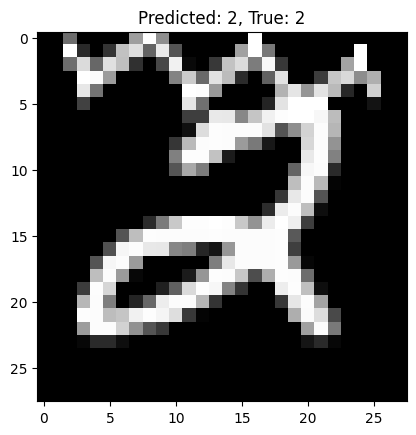

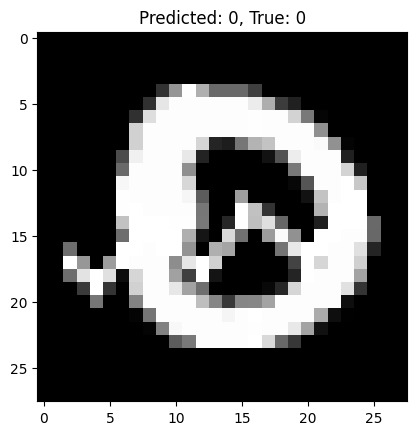

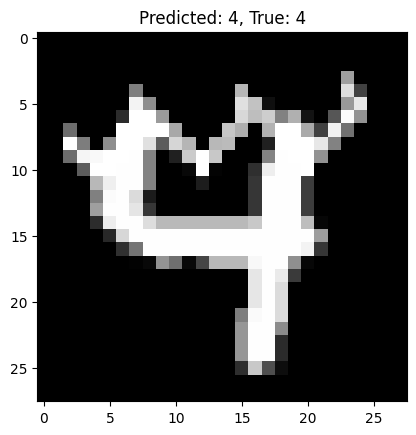

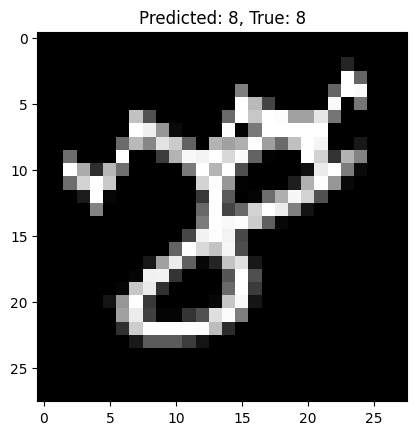

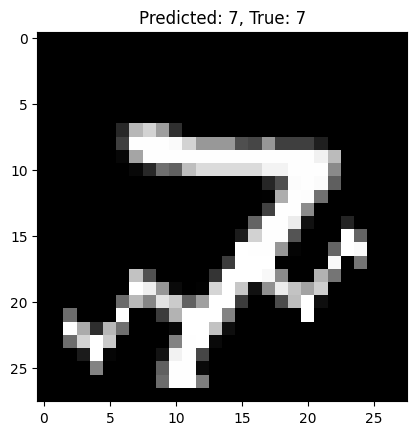

In [8]:
# Visualize some predictions
for images, labels in ds_test.take(1):
    predictions = model.predict(images)
    for i in range(5):
        plt.imshow(images[i].numpy().reshape(28, 28), cmap='gray')
        plt.title(f"Predicted: {tf.argmax(predictions[i]).numpy()}, True: {labels[i].numpy()}")
        plt.show()